**Neural and Evolutionary Computation (NEC)**
# Activity 1: Prediction with Back-Propagation and Linear Regression
**By Manuel Bueno, 2024**

## Content
1. Selecting and analyzing the dataset
2. Implementation of BP
3. Obtaining and comparing predictions using the three models (BP, BP-F,MLR-F)
    1. Hyperparameter comparison and selection
    2. Model result comparison
4. Optional Part 2: Introduce Cross Validation in the model selection and validation

## 1. Selecting and analyzing the dataset

The dataset utilized for this study is the "House Sales in King County, USA," which can be accessed through the following link: [https://www.kaggle.com/datasets/harlfoxem/housesalesprediction](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction). This dataset provides comprehensive information on housing transactions within King County, including various attributes relevant to predicting house prices. The `price`feature was selected as the target value.

Given the permissive nature of the dataset's license (CC0: Public Domain), a local copy was downloaded to enable rapid access, streamline data integration, and eliminate reliance on a Kaggle account for retrieval.  

The dataset is locally stored in the file _data/kc_house_data.csv_, comprising an original structure of more than 21,600 instances and 21 features: `id`, `date`, `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `waterfront`, `view`, `condition`, `grade`, `sqft_above`, `sqft_basement`, `yr_built`, `yr_renovated`, `zipcode`, `lat`, `long`, `sqft_living15`, and `sqft_lot15`.

To facilitate data preprocessing, the `PreprocessData` class was developed (available in the root directory of this project). 

In [1]:
from PreprocessData import PreprocessData

preprocessData = PreprocessData()
input_dataset = preprocessData.read_csv_file()
input_dataset.info()
input_dataset.describe()

PreprocessData initialized.
Reading data from ./data/kc_house_data.csv...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From a previous inspection to input_dataset some features were identified as categorical: `floors`, `waterfront` (0 or 1) and `view` (mostly 0, 1, 2, 3 or 4). On the other hand, `date`, `lat` and `long` will requiere a deeper analysis.


### Scatter plots for numerical features
For potencial numerical features `scatter_matrix`, from the Pandas library, was used to try to determine possible relationship between features and target. While not entirely conclusive, it appears that features such as `bedrooms`, `bathrooms`, `condition`, `grade`, `sqft_living`, and possibly `sqft_lot` exhibit an influence on property prices.  


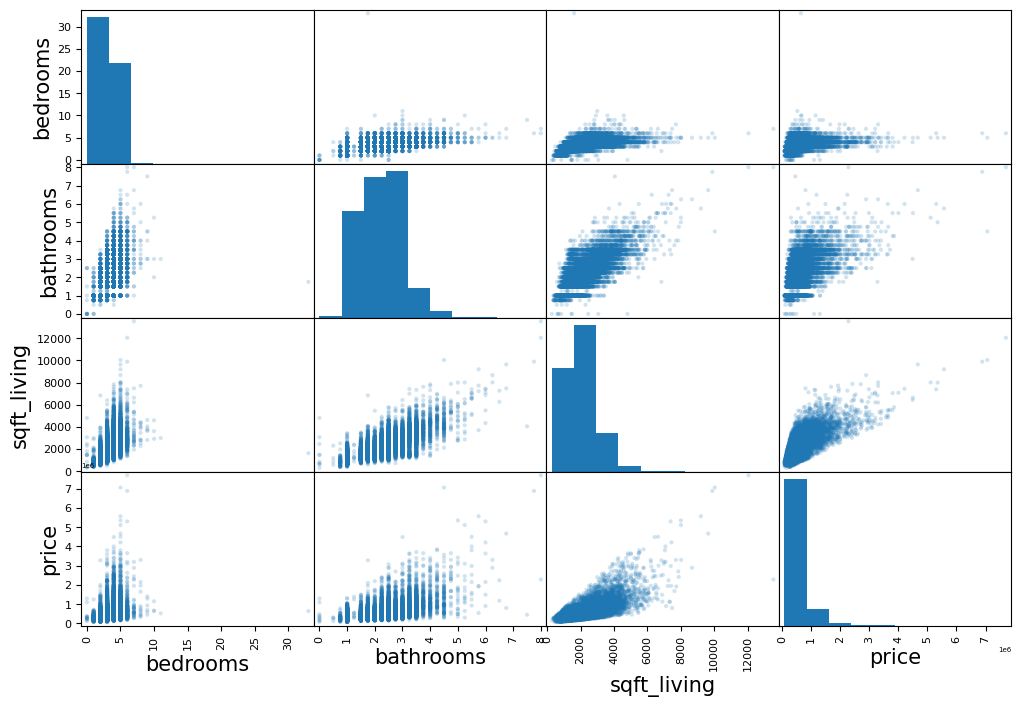

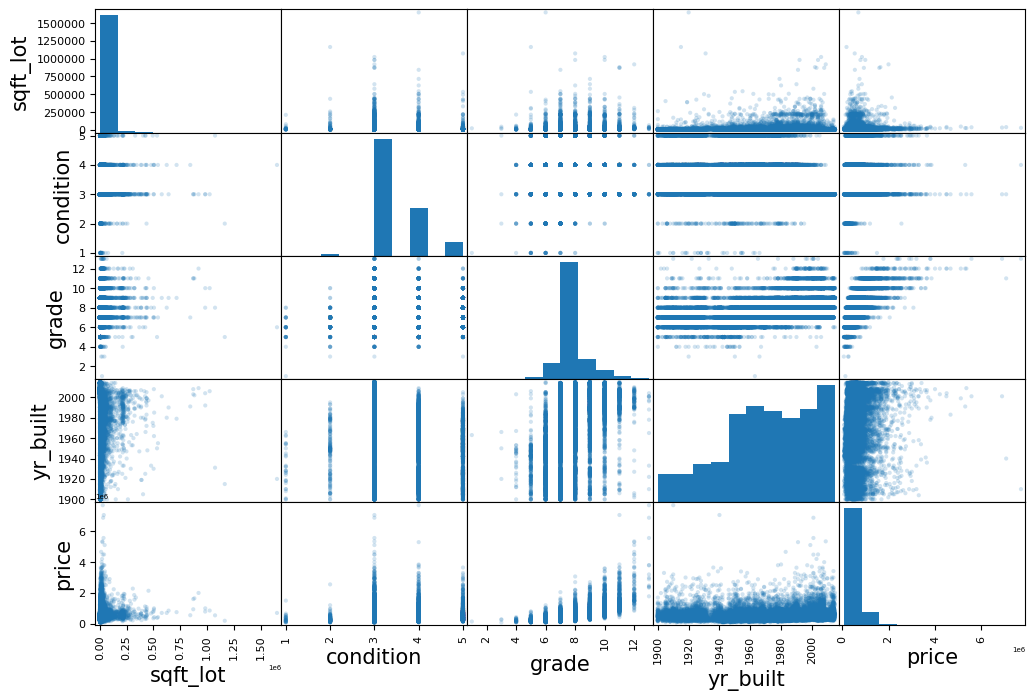

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix 

plt.rc('font', size=7)
plt.rc('axes', labelsize=15, titlesize=7)
plt.rc('legend', fontsize=9)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)

features_to_inspect = ['bedrooms', 'bathrooms', 'sqft_living', 'price']
pd.plotting.scatter_matrix(input_dataset[features_to_inspect], alpha=0.2, figsize=(12,8))
plt.show() 
features_to_inspect = ['sqft_lot', 'condition', 'grade', 'yr_built', 'price']
pd.plotting.scatter_matrix(input_dataset[features_to_inspect], alpha=0.2, figsize=(12,8))
plt.show() 


For **lat/long features** we will try to k-means to identify high-prices zones, under the premises that hight density zones have higher mean for property prices.

### Transforming property location features  

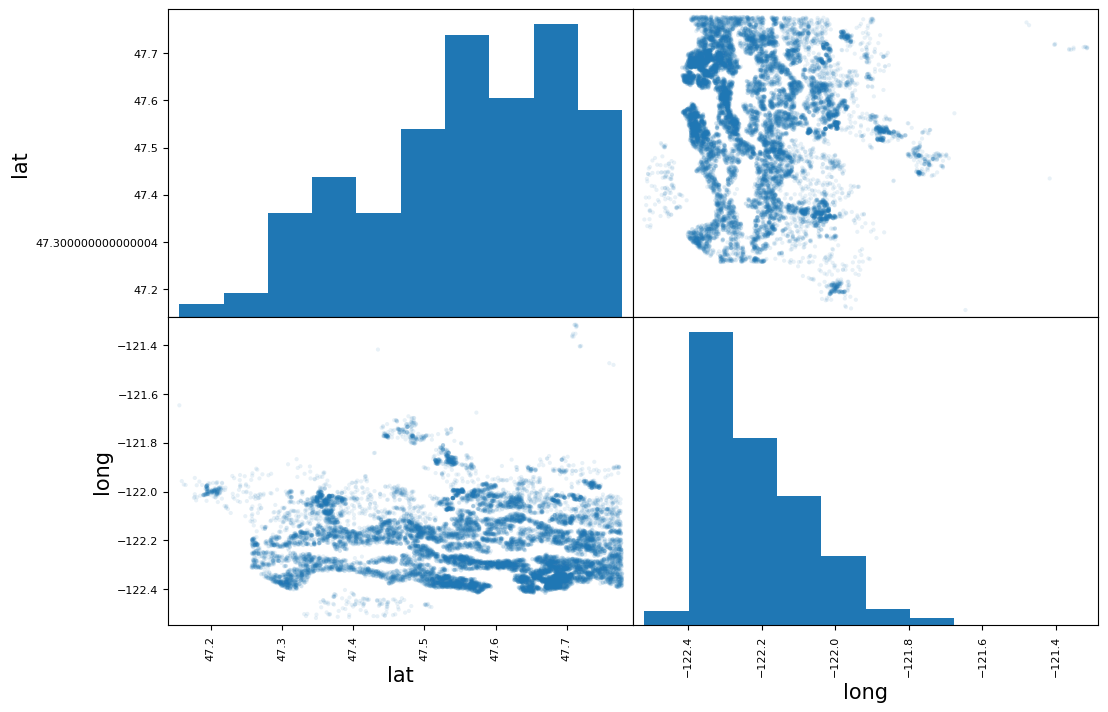

In [3]:
plt.show() 
features_to_inspect = ['lat', 'long']
pd.plotting.scatter_matrix(input_dataset[features_to_inspect], alpha=0.1, figsize=(12,8))
plt.show() 

The `PreprocessData` class includes dedicated methods for the following tasks:

- Reading the dataset file in CSV format.
- Truncating the dataset in a random way, to a smaller size to reduce execution times during development.
- Filtering the dataset to retain a subset of features considered non-redundant and relevant for predicting property prices: `date`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `waterfront`, `view`, `condition`, `grade`, `yr_built`, `lat`, `long`, and `price`.
- Although the data is complete in all instances, removing instances with missing values in the selected features.
- Eliminating outlier instances for features deemed appropriate for such filtering.
- Splitting the dataset into training/validation and test samples.
- Creating transformations for the selected features and fitting their parameters to the training/validation sample.
- Transforming the training/validation sample and the test sample separately.
- Saving the processed samples to files for subsequent use.


### Truncating, filtering and dropping missing values from the dataset

In [4]:
dataset_size = 10000
input_dataset = preprocessData.truncate_dataframe(input_dataset, dataset_size)
input_dataset = preprocessData.filter_features(input_dataset)
input_dataset = preprocessData.drop_missing_values(input_dataset)


Truncating data randomly to 10000 rows
Selecting this columns from the data: ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long', 'price']
Removing missing values from columns: ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long', 'price']


### On dropping outliers
Although the **Interquartile Range (IQR) method** was initially implemented in method `PreprocessData.drop_outliers`, based on the exploratory data analysis, it was determined that the IQR method is unnecessary for this particular dataset.

In [5]:
input_dataset = preprocessData.drop_outliers(input_dataset)


Removing outliers values from columns: []


### Splitting the dataset
The next step is to split the input dataset into train/validation and test datasets, and transform them

In [6]:
train_data, test_data = preprocessData.split_data(input_dataset)

Splitting data: train_data (8000) and test_data (2000)


### Transforming datasets
Descriptive statistics generated by the `describe()` function reveal significant disparities between the 75th percentile and the maximum values for `sqft_living` and `sqft_lot`, amounting to one and two orders of magnitude, respectively. These differences are clearly illustrated in the corresponding histograms.  


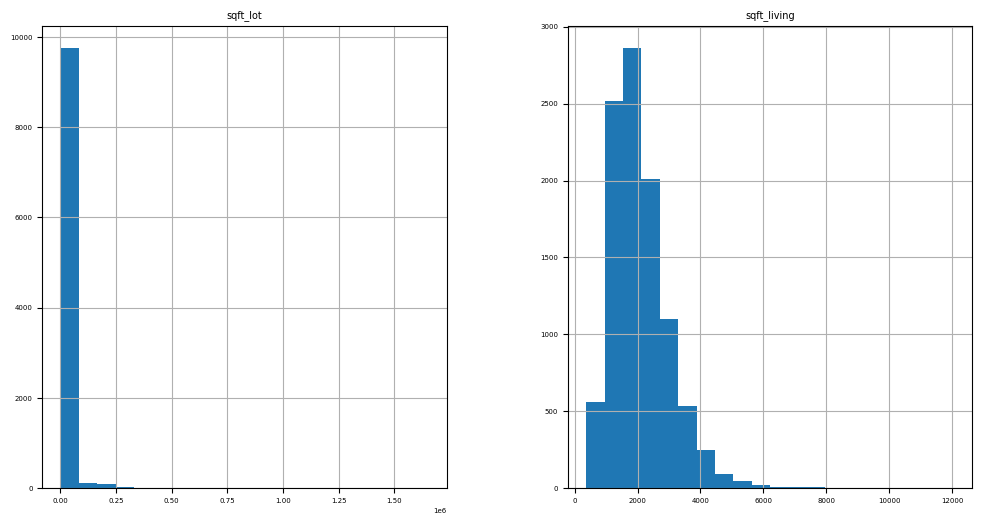

In [7]:
features_to_inspect = ['sqft_lot', 'sqft_living']
input_dataset[features_to_inspect].hist(bins=20, figsize=(12, 6))
plt.show()



However no logarithmic transformations were applied because we considered that maintaining the scale was convenient for predicting the price of the most expensive properties. 

For the reest of the features, both dataset were transformed using these transformations (see `PreprocessData.PreprocessData.create_column_transformer`):

| **Feature**     | **Transformations**                                                                     |
|-----------------|-----------------------------------------------------------------------------------------|
| **date**        | - `ConvertDateToDays(date_column='date')`<br>- `MinMaxScaler()`                         |
| **bedrooms**    | - `FunctionTransformer(np.log1p, feature_names_out="one-to-one")`<br>- `MinMaxScaler()` |
| **bathrooms**   | - `MinMaxScaler()`                                                                      |
| **sqft_living** | - `MinMaxScaler()`                                                                      |
| **sqft_lot**    | - `MinMaxScaler()`                                                                      |
| **floors**      | - `OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown="error")`        |
| **waterfront**  | - `OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown="error")`        |
| **view**        | - `OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown="error")`        |
| **condition**   | - `MinMaxScaler()`                                                                      |
| **grade**       | - `MinMaxScaler()`                                                                      |
| **yr_built**    | - `MinMaxScaler()`                                                                      |
| **lat**         | - `MinMaxScaler()`                                                                      |
| **long**        | - `MinMaxScaler()`                                                                      |
| **price**       | - `MinMaxScaler()`                                                                      |

Aditionally, a customized `ClusterSimilarity` class (in _PreprocessData.py_ file), implemented in the book **_Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd edition)_** by [Aurélien Géron], was used to generate new features for coordinates cluster.

```python
def fit(self, X, y=None, sample_weight=None):
    self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self
        
def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
```


In [8]:
input_data_transformer = preprocessData.create_column_transformer()
input_data_transformer, train_data = preprocessData.fit_training_data(input_data_transformer, train_data)
transformed_train_matrix, transformed_test_matrix = preprocessData.transform_data(input_data_transformer, train_data, test_data)
preprocessData.save_transformed_data(transformed_train_matrix, transformed_test_matrix, input_data_transformer)


Creating ColumnTransformer
Fit train_data
Transforming train_data and test_data with columns: '['date__days_since_first_date' 'bedrooms__bedrooms' 'bathrooms__bathrooms'
 'sqft_living__sqft_living' 'sqft_lot__sqft_lot' 'floors__floors'
 'waterfront__waterfront_1' 'view__view_0' 'view__view_1' 'view__view_2'
 'view__view_3' 'view__view_4' 'condition__condition' 'grade__grade'
 'yr_built__yr_built' 'lat__lat' 'long__long' 'price__price'
 'geo__cluster_0_coordinates' 'geo__cluster_1_coordinates'
 'geo__cluster_2_coordinates' 'geo__cluster_3_coordinates'
 'geo__cluster_4_coordinates' 'geo__cluster_5_coordinates'
 'geo__cluster_6_coordinates' 'geo__cluster_7_coordinates'
 'geo__cluster_8_coordinates' 'geo__cluster_9_coordinates']'
Train matrix saved to ./data/transformed_train_matrix.csv
Test matrix saved to ./data/transformed_test_matrix.csv
Transformer saved to ./data/transformer.pkl


**Box plots** can be utilized to inspect the resulting distributions of the transformed 
features.  


['date__days_since_first_date' 'bedrooms__bedrooms' 'bathrooms__bathrooms'
 'sqft_living__sqft_living' 'sqft_lot__sqft_lot' 'floors__floors'
 'waterfront__waterfront_1' 'view__view_0' 'view__view_1' 'view__view_2'
 'view__view_3' 'view__view_4' 'condition__condition' 'grade__grade'
 'yr_built__yr_built' 'lat__lat' 'long__long' 'price__price'
 'geo__cluster_0_coordinates' 'geo__cluster_1_coordinates'
 'geo__cluster_2_coordinates' 'geo__cluster_3_coordinates'
 'geo__cluster_4_coordinates' 'geo__cluster_5_coordinates'
 'geo__cluster_6_coordinates' 'geo__cluster_7_coordinates'
 'geo__cluster_8_coordinates' 'geo__cluster_9_coordinates']


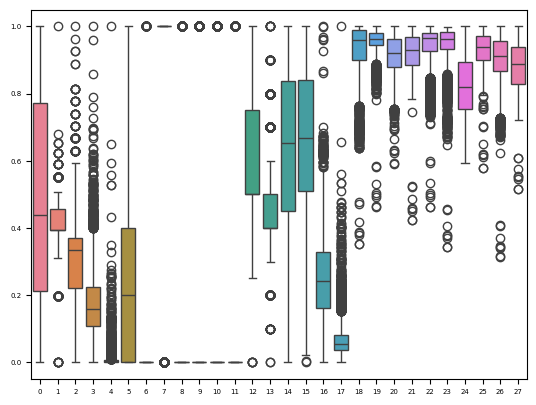

In [9]:
import seaborn as sns

print(input_data_transformer.get_feature_names_out())
sns.boxplot(transformed_train_matrix)
plt.show()

For future use, these methods are wrapped together in the `PreprocessData.select_and_analyze_dataset` method.


## 2. Implementation of BP


A `NeuralNet` class was implemented, incorporating the methods `fit(X, y)`, `predict(X)`, and `loss_epochs()` in accordance with the provided instructions. This implementation is based on the methodology outlined in _Listing 1: Online BP algorithm_ in **_Supervised Learning using Back-Propagation [Sergio Gómez]_**. Each step was translated to the following fragments:

| **Step**                                                                                                       | **Code**                                                                                                                                                                         |
|----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Online BP algorithm: L2 - Initialize all weights and thresholds randomly                                       | `self.w = [None]`<br>`self.theta = [None]`<br>...                                                                                                                           |
| Online BP algorithm: L3 - For epoch = 1 To num epochs                                                          | `for epoch in range(self.n_epochs):`                                                                                                                               |
| Online BP algorithm: L4 - For pat = 1 To num training patterns                                                 | `for pat in range(num_train_samples):`                                                                                                                         |
| Online BP algorithm: L5 - Choose a random pattern (xμ, zμ) of the training set                                 | `idx = np.random.randint(num_train_samples)`<br>        `x_mu = X_train_shuffled[idx].reshape(-1, 1)` <br>        `z_mu = y_train_shuffled[idx].reshape(-1, 1)` |
| Online BP algorithm: L6 - Feed−forward propagation of pattern xμ to obtain the output o(xμ)                    |         `self.feedforward(x_mu)`                                                                                                                                   |
| Online BP algorithm: L7 - Back−propagate the error for this pattern                                            |       `self.backpropagate(z_mu)`                                                                                                                                 |
| Online BP algorithm: L8 - Update the weights and thresholds                                                    |         `self.update_weights()`                                                                                                                                   |
| Online BP algorithm: L9                                                                                        |                                                                                                                                                                                  |
| Online BP algorithm: L10 - Feed−forward all training patterns and calculate their prediction quadratic error   |     `train_error = self.calculate_error(X_train, y_train)`                                                                                                         |
| Online BP algorithm: L11 - Feed−forward all validation patterns and calculate their prediction quadratic error |     `val_error = self.calculate_error(X_val, y_val)`                                                                                                               |
| Online BP algorithm: L12                                                                                       |                                                                                                                                                                                  |
| Online BP algorithm: L13                                                                                       |                                                                                                                                                                                  |
| Online BP algorithm: L14 - Feed−forward all test pattern                                                       | `def predict(self, X):`                                                                                                                                            |

The main points of the implementation are:

```python
def feedforward(self, x):
    self.xi[0] = x
    for l in range(1, self.L):
        self.h[l] = np.dot(self.w[l], self.xi[l - 1]) - self.theta[l]
        self.xi[l] = self.activation_function(self.h[l])
```
ξ(1) = x , introducing a pattern in the input layer of the network, Step (6) of Feed-forward propagation section in **_Supervised Learning using Back-Propagation [Sergio Gómez]_** \
Compute h^(l) = W^(l) * ξ^(l-1) - θ^(l), from Step (8) \
Compute ξ^(l) = g(h^(l)), from Step (7) \
g(h), from Step 10, is defined in the function `get_activation_function()`.

```python
def backpropagate(self, z):
    l = self.L - 1
    self.delta[l] = (self.xi[l] - z) * self.activation_derivative(self.h[l])
    for l in range(self.L - 2, 0, -1):
        self.delta[l] = np.dot(self.w[l + 1].T, self.delta[l + 1]) * self.activation_derivative(self.h[l])
    for l in range(1, self.L):
        self.d_w[l] = -self.learning_rate * np.dot(self.delta[l], self.xi[l - 1].T) + self.momentum * self.d_w_prev[l]
        self.d_theta[l] = self.learning_rate * self.delta[l] + self.momentum * self.d_theta_prev[l]

```

Compute delta for the output layer, Δ_i^(L) = g'(h_i^(L))(o_i(x) - z_i), Step (11) of Error back-propagation section in **_Supervised Learning using Back-Propagation [Sergio Gómez]_** \
Backpropagate through the rest of the layers, Δ_j^(ℓ-1) = g'(h_j^(ℓ-1)) Σ Δ_i^(ℓ) ω_ij^(ℓ), from Step (12) \
g(h), from Step 13, is defined in the function `get_activation_function()`.

### Using the manually created BP implementation

This implementation could be used as follows:

In [10]:
from NeuralNet import NeuralNet
from PreprocessData import PreprocessData
import numpy as np

preprocessData = PreprocessData()
preprocessData.select_and_analyze_dataset(size=4000)
X_in, y_in = preprocessData.read_transformed_data_from_file() #train data
X_to_predict, y_real = preprocessData.read_transformed_data_from_file('./data/transformed_test_matrix.csv')
print(f" Size of X and Y for training: {len(X_in)}")
print(f" Size of X and Y to compare predictions: {len(X_to_predict)}")

PreprocessData initialized.
Reading data from ./data/kc_house_data.csv...
Truncating data randomly to 4000 rows
Selecting this columns from the data: ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long', 'price']
Removing missing values from columns: ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long', 'price']
Removing outliers values from columns: []
Splitting data: train_data (3200) and test_data (800)
Creating ColumnTransformer
Fit train_data
Transforming train_data and test_data with columns: '['date__days_since_first_date' 'bedrooms__bedrooms' 'bathrooms__bathrooms'
 'sqft_living__sqft_living' 'sqft_lot__sqft_lot' 'floors__floors'
 'waterfront__waterfront_1' 'view__view_0' 'view__view_1' 'view__view_2'
 'view__view_3' 'view__view_4' 'condition__condition' 'grade__grade'
 'yr_built__yr_built' 'lat__lat' 'lo

In [11]:
neural_net = NeuralNet(
    L=4,
    n= [np.shape(X_in)[1], 20, 10, 1],
    n_epochs=100,
    learning_rate=0.01,
    momentum=0.9,
    activation_function='sigmoid',
    validation_split=0.2
)
neural_net.fit(X_in, y_in)
predictions = neural_net.predict(X_to_predict)
training_errors, validation_errors = neural_net.loss_epochs()


NeuralNet initialized with self.L = '4', self.n = '[27, 20, 10, 1]', self.n_epochs = '100', self.learning_rate = '0.01', self.momentum = '0.9', self.fact = 'sigmoid', self.validation_split = '0.2'
Executing fit(X, y)
Executing predict(X)
Executing loss_epochs()


Prediction vs Expected Y and Training Error vs Validation Error can be inspected as follows:

In [12]:
for pred, real in zip(predictions[:3], y_real[:3]):
    print(f"Prediction: {pred}, Expected Y: {real}")
for train_err, val_err in list(zip(training_errors[:3], validation_errors[:3])):
    print(f"Training Error: {train_err}, Validation Error: {val_err}")

Prediction: [0.15467961], Expected Y: 0.0988852459016393
Prediction: [0.1887437], Expected Y: 0.2104918032786885
Prediction: [0.06332278], Expected Y: 0.0607213114754098
Training Error: 0.002676501833467871, Validation Error: 0.0017016899264312886
Training Error: 0.002652473062632786, Validation Error: 0.001682880859529516
Training Error: 0.0026246025124435465, Validation Error: 0.0016668458740427394


## 3. Obtaining and comparing predictions using the three models (BP, BP-F,MLR-F)

## 3.A Hyperparameter comparison and selection

We will explore some of the space of hyperparameters, trying different combinations and 
evaluating the quality of the result of the prediction obtained using them.

For that, we load the hyperparameter combinations and the transformed train dataset from files.

In [13]:
import pandas as pd
hyperparameters = pd.read_csv("data/neural_network_parameters.csv")
print(hyperparameters)

    Number of Layers     Layer Structure  Num Epochs  Learning Rate  Momentum  \
0                  3          [27, 5, 1]         100          0.001      0.85   
1                  4      [27, 12, 5, 1]         150          0.005      0.95   
2                  5  [27, 44, 12, 5, 1]         350          0.010      0.95   
3                  5  [27, 44, 12, 5, 1]         350          0.010      0.95   
4                  5  [27, 44, 12, 5, 1]         250          0.010      0.90   
5                  5  [27, 44, 12, 5, 1]         250          0.001      0.95   
6                  5  [27, 44, 12, 5, 1]         350          0.010      0.95   
7                  4      [27, 27, 5, 1]         350          0.010      0.95   
8                  4      [27, 44, 7, 1]         250          0.010      0.95   
9                  5  [27, 44, 12, 5, 1]         250          0.010      0.95   
10                 3          [27, 5, 1]         180          0.005      0.85   

   Activation Function  
0 

In [14]:
X_in, y_in = preprocessData.read_transformed_data_from_file()
print(f"X_in size {len(X_in)}")
print(f"X_in size {len(y_in)}")
print(X_in[:1])
print(y_in[:1])

Reading X and y data from file './data/transformed_train_matrix.csv' with target 'price__price'
X_in size 3200
X_in size 3200
[[0.95490716 0.39312326 0.125      0.06706793 0.01250124 0.
  0.         1.         0.         0.         0.         0.
  0.75       0.4        0.39130435 0.85969303 0.19269103 0.9801813
  0.77259974 0.87375594 0.99744358 0.92617907 0.98831357 0.8184965
  0.90232522 0.95810025 0.96602562]]
[0.05265574]


### Executing predictions for each combinations of hyperparameters
- we create a new instance of the NeuralNet with the hyperparameters combination,
- call the `NeuralNet.fit()` function with Y_in (instances) and y_in (ground truth target values) to train our neuronal network,
- call the `NeuralNet.predict()` function to obtain the estimated target values (y).

In [17]:
from NeuralNet import NeuralNet
from sklearn.model_selection import train_test_split

X_train_for_comparison, X_test_for_comparison, y_train_for_comparison, y_test_for_comparison = train_test_split(X_in, y_in, test_size=0.2, random_state=31)
neural_net_result_params = {}
for i, params in hyperparameters.iterrows():
    print(f"--- Combination {i} ---")
    neural_net = NeuralNet(
        L = params["Number of Layers"],
        n = eval(params["Layer Structure"]),  # Convert string to list
        n_epochs = params["Num Epochs"],
        learning_rate = params["Learning Rate"],
        momentum = params["Momentum"],
        activation_function = params["Activation Function"],
        validation_split = 0.2
    )

    neural_net.fit(X_train_for_comparison, y_train_for_comparison)
    y_pred = neural_net.predict(X_test_for_comparison)
    epoch_loss = neural_net.loss_epochs()

    neural_net_result_params[i] = {
        "Combination": i,
        "Hyperparameters": params.to_dict(),
        "Y_pred": y_pred,
        "Epoch_loss": epoch_loss
    }

--- Combination 0 ---
NeuralNet initialized with self.L = '3', self.n = '[27, 5, 1]', self.n_epochs = '100', self.learning_rate = '0.001', self.momentum = '0.85', self.fact = 'relu', self.validation_split = '0.2'
Executing fit(X, y)
Executing predict(X)
Executing loss_epochs()
--- Combination 1 ---
NeuralNet initialized with self.L = '4', self.n = '[27, 12, 5, 1]', self.n_epochs = '150', self.learning_rate = '0.005', self.momentum = '0.95', self.fact = 'tanh', self.validation_split = '0.2'
Executing fit(X, y)
Executing predict(X)
Executing loss_epochs()
--- Combination 2 ---
NeuralNet initialized with self.L = '5', self.n = '[27, 44, 12, 5, 1]', self.n_epochs = '350', self.learning_rate = '0.01', self.momentum = '0.95', self.fact = 'tanh', self.validation_split = '0.2'
Executing fit(X, y)
Executing predict(X)
Executing loss_epochs()
--- Combination 3 ---
NeuralNet initialized with self.L = '5', self.n = '[27, 44, 12, 5, 1]', self.n_epochs = '350', self.learning_rate = '0.01', self.mome

neural_net_result_params is a dictionary that contains the info about each combinations of hyperparameter and the result of their predictions. For example, we will show the contain of the first element (0):

In [19]:
print(neural_net_result_params[0])

{'Combination': 0, 'Hyperparameters': {'Number of Layers': 3, 'Layer Structure': '[27, 5, 1]', 'Num Epochs': 100, 'Learning Rate': 0.001, 'Momentum': 0.85, 'Activation Function': 'relu'}, 'Y_pred': array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
    

Now we can calculate MSE(Mean Squared Error), MAE (Mean Absolute Error) and MAPE (Mean Absolute Percentage Error), and compare the results.

After execution the predictions, if  NaN values are generated, we delete the result for that combination

In [20]:
import numpy as np

i = 0
while i < len(neural_net_result_params):
    if np.isnan(neural_net_result_params[i]["Y_pred"]).any():
        print(f"Handling NaN in Combination {neural_net_result_params[i]['Combination']}")
        del neural_net_result_params[i]
    i += 1
neural_net_result_params = neural_net_result_params.copy()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

for key, result in neural_net_result_params.items():
    y_pred = result["Y_pred"]
    
    mse = mean_squared_error(y_test_for_comparison, y_pred)
    mae = mean_absolute_error(y_test_for_comparison, y_pred)
    mape = mean_absolute_percentage_error(y_test_for_comparison, y_pred)

    result["MSE"] = mse
    result["MAE"] = mae
    result["MAPE"] = mape
    

For each combination of hiperparameters we now have values of MSE, MAE and MAPE. For example, we will show the contain of the first element (0):

In [23]:
print(neural_net_result_params[0]["MSE"])

0.00620254484911945


### Comparing the performance of hyperparameter combinations

In [24]:
data = []
for key, result in neural_net_result_params.items():
    hyperparams = result["Hyperparameters"]
    data.append({
        "Combination": key,
        "Number of Layers": hyperparams["Number of Layers"],
        "Layer Structure": hyperparams["Layer Structure"],
        "Num Epochs": hyperparams["Num Epochs"],
        "Learning Rate": hyperparams["Learning Rate"],
        "Momentum": hyperparams["Momentum"],
        "Activation Function": hyperparams["Activation Function"],
        "MAPE": result["MAPE"],
        "MAE": result["MAE"],
        "MSE": result["MSE"]
    })

hyperparameters_performance_results = pd.DataFrame(data)
hyperparameters_performance_results = hyperparameters_performance_results.sort_values(
    by=["MAPE"],
    ascending=[True]
)
hyperparameters_performance_results.to_csv("./data/hyperparameters_performance_results.csv", index=False)
print("Data frame saved to 'hyperparameters_performance_results.csv' with the following columns:")
print(hyperparameters_performance_results)


Data frame saved to 'hyperparameters_performance_results.csv' with the following columns:
    Combination  Number of Layers     Layer Structure  Num Epochs  \
2             2                 5  [27, 44, 12, 5, 1]         350   
7             7                 4      [27, 27, 5, 1]         350   
8             8                 4      [27, 44, 7, 1]         250   
6             6                 5  [27, 44, 12, 5, 1]         350   
9             9                 5  [27, 44, 12, 5, 1]         250   
4             4                 5  [27, 44, 12, 5, 1]         250   
5             5                 5  [27, 44, 12, 5, 1]         250   
1             1                 4      [27, 12, 5, 1]         150   
3             3                 5  [27, 44, 12, 5, 1]         350   
10           10                 3          [27, 5, 1]         180   
0             0                 3          [27, 5, 1]         100   

    Learning Rate  Momentum Activation Function      MAPE       MAE       MSE  
2

Sort results by MAE:

In [25]:
neural_net_result_params_first_items = sorted(neural_net_result_params.items(), key=lambda x: x[1]["MAE"])
y_predicted_by_manual_bp = neural_net_result_params_first_items[0]
print(f"The combination with best MAE is '{y_predicted_by_manual_bp[0]}'")

The combination with best MAE is '2'


These are the scatter plots of the **Prediction Value vs Real Value** of the combinations with **lowest MAE**:

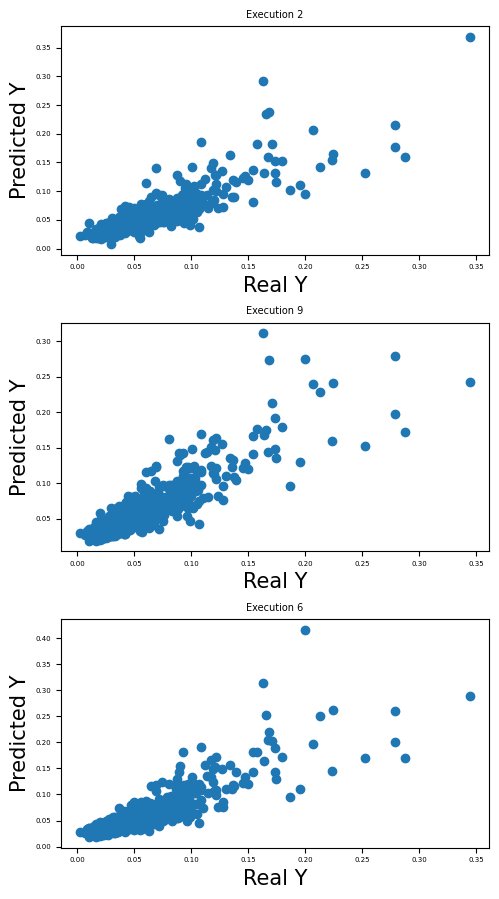

In [27]:
import matplotlib.pyplot as plt
import math

# n = len(neural_net_result_params)
n = 3
fig, axes = plt.subplots(n, 1, figsize=(5, 3*n))
if n == 1:
    axes = [axes]

for i, (key, value) in enumerate(neural_net_result_params_first_items[:3]):
    Yi_pred = value["Y_pred"]
    Yi_pred = Yi_pred.reshape(-1)

    axes[i].scatter(y_test_for_comparison, Yi_pred)
    axes[i].set_title(f'Execution {value["Combination"]}')
    axes[i].set_xlabel('Real Y')
    axes[i].set_ylabel('Predicted Y')
plt.tight_layout()
plt.show()

And These are the scatter plots of the **evolution of the training and validation** error as a function
of the number of epochs of the combinations with **lowest MAE**:

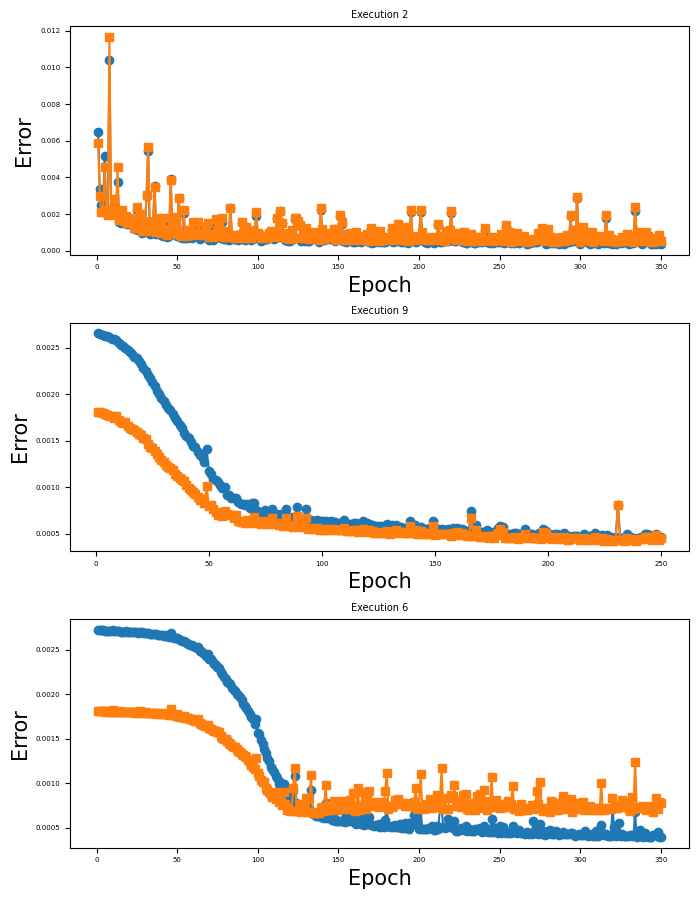

In [28]:
import matplotlib.pyplot as plt
import math

# n = len(neural_net_result_params)
n = 3
fig, axes = plt.subplots(n, 1, figsize=(7, 3*n))
if n == 1:
    axes = [axes]

for i, (key, value) in enumerate(neural_net_result_params_first_items[:3]):
    training_errors, validation_errors = value["Epoch_loss"]
    epochs = range(1, len(training_errors) + 1)
    
    axes[i].plot(epochs, training_errors, label='Training Error', marker='o')
    axes[i].plot(epochs, validation_errors, label='Validation Error', marker='s')
    axes[i].set_title(f'Execution {value["Combination"]}')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Error')
plt.tight_layout()
plt.show()

## 3.B Model result comparison
Prepare the dataset to be used for the model comparison:

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train_for_comparison, X_test_for_comparison, y_train_for_comparison, y_test_for_comparison = train_test_split(X_in, y_in, test_size=0.2, random_state=31)


### Linear-regression model

First, we are going to use the sklearn library to obtain new predictions from a linear regression model. We train the model:

In [30]:
linear_regression_model = LinearRegression(fit_intercept=True, n_jobs=None)
linear_regression_model.fit(X_train_for_comparison, y_train_for_comparison)


LinearRegression()

And start the linear-regression prediction process

In [31]:
y_predicted_by_mlr = linear_regression_model.predict(X_test_for_comparison)
print(f"[1] Predicted by linear regression '{y_predicted_by_mlr[:1]}' vs '{y_test_for_comparison[:1]}' real price.")

[1] Predicted by linear regression '[0.0637207]' vs '[0.04754098]' real price.


### BP model from Keras library
The next step is to obtain new predictions from a multi layer neural network using the Keras library. For that we:
1. Define new hyperparameters.
2. Build multi-layer model
3. Train model
4. Predict a new y values

Poor performance was observed when utilizing activation functions other than `keras_activation = 'relu'` for hidden layers and `keras_output_activation = 'sigmoid'` for the output layer.  
 

**Note: There may be an expected warning message related to urllib3 v2 when the tensorflow library is imported.**

In [45]:
import tensorflow as tf

keras_input_dim = X_train_for_comparison.shape[1]
keras_hidden_units_1 = 44
keras_hidden_units_2 = 12
keras_hidden_units_3 = 5
keras_activation = 'relu'
keras_output_activation = 'sigmoid'
keras_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) 
keras_loss = 'mse'
keras_epochs = 100
keras_batch_size = X_train_for_comparison.shape[0]
print(f"Checking number of features for input layer: {keras_input_dim}")

Checking number of features for input layer: 27


In [46]:
from tensorflow.keras import layers, models

keras_model = models.Sequential([
    layers.Input(shape=(keras_input_dim,)),
    layers.Dense(keras_hidden_units_1, activation=keras_activation),
    layers.Dense(keras_hidden_units_2, activation=keras_activation),
    layers.Dense(keras_hidden_units_3, activation=keras_activation),
    layers.Dense(1, activation=keras_output_activation)
])

keras_model.compile(optimizer = keras_optimizer, loss = keras_loss, metrics = ['mae'])
print(f"Checking multi-layer model is built: {keras_model}")

Checking multi-layer model is built: <Sequential name=sequential_2, built=True>


We use a `keras_scaler` to transform `X_train_for_comparison` to `X_train_for_comparison_scaled` and then, use `X_train_for_comparison_scaled, y_train_for_comparison` to fit the Keras model.

In [47]:
from sklearn.preprocessing import StandardScaler

keras_scaler = StandardScaler()
X_train_for_comparison_scaled = keras_scaler.fit_transform(X_train_for_comparison) #Should we trasnform X again?
keras_history = keras_model.fit(X_train_for_comparison_scaled, y_train_for_comparison,
                          epochs = keras_epochs,
                          batch_size = keras_batch_size,
                          validation_split = 0.2,
                          verbose = 1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 0.1333 - mae: 0.3575 - val_loss: 0.1274 - val_mae: 0.3481
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1279 - mae: 0.3496 - val_loss: 0.1221 - val_mae: 0.3401
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1226 - mae: 0.3416 - val_loss: 0.1168 - val_mae: 0.3319
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1173 - mae: 0.3335 - val_loss: 0.1116 - val_mae: 0.3236
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1121 - mae: 0.3253 - val_loss: 0.1064 - val_mae: 0.3152
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1070 - mae: 0.3171 - val_loss: 0.1013 - val_mae: 0.3067
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1020 - mae: 0.3088 - val_loss: 0.0963 - val_mae: 0.2982
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0970 - mae: 0.3004 - val_loss: 0.0915 - val_mae: 0.2898
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0921 - mae:

In [48]:
X_test_for_comparison_scaled = keras_scaler.transform(X_test_for_comparison)
y_predicted_by_keras = keras_model.predict(X_test_for_comparison_scaled).flatten()
y_predicted_by_keras[:1]

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step


array([0.0189821], dtype=float32)

### Calculate scoring for linear-regression and BP Keras models
Now we calculate MAE, MSE and MAPE for both y_pred_mlr and y_pred_keras.

In [49]:
def metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred)**2)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    return mae, mse, mape

y_predicted_by_manual_bp_as_array = y_predicted_by_manual_bp[1]['Y_pred'] # Extract data from structure

print(len(y_test_for_comparison))
print(len(y_predicted_by_manual_bp_as_array))
print(len(y_predicted_by_mlr))
print(len(y_predicted_by_keras))

mae_pred_bp, mse_pred_bp, mape_pred_bp = metrics(y_test_for_comparison, y_predicted_by_manual_bp_as_array)
mae_pred_mlr, mse_pred_mlr, mape_pred_mlr = metrics(y_test_for_comparison, y_predicted_by_mlr)
mae_pred_keras, mse_pred_keras, mape_pred_keras = metrics(y_test_for_comparison, y_predicted_by_keras)

model_comparison_results = pd.DataFrame({
    'Error measures': ['MAE', 'MSE', 'MAPE'],
    'BP': [mae_pred_bp, mse_pred_bp, mape_pred_bp],
    'MLR-F': [mae_pred_mlr, mse_pred_mlr, mape_pred_mlr],
    'BP-F': [mae_pred_keras, mse_pred_keras, mape_pred_keras]
})

print(model_comparison_results)

640
640
640
640
  Error measures         BP      MLR-F       BP-F
0            MAE   0.036671   0.015377   0.029959
1            MSE   0.002979   0.000485   0.002029
2           MAPE  82.215209  34.343529  61.963411


Now we show scatter plots of predicted vs real values for BP (manually), MLR-F, BP-F models.

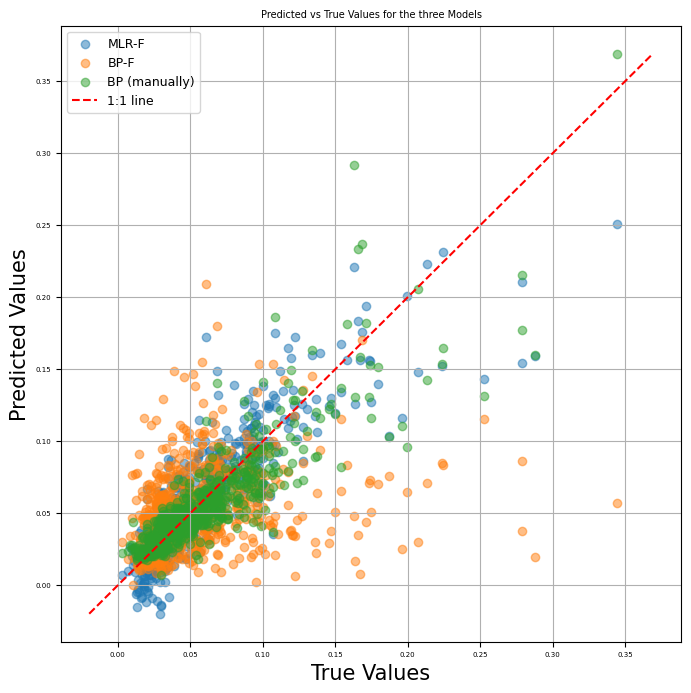

In [51]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_for_comparison, y_predicted_by_mlr, alpha=0.5, label='MLR-F')
plt.scatter(y_test_for_comparison, y_predicted_by_keras, alpha=0.5, label='BP-F')
plt.scatter(y_test_for_comparison, y_predicted_by_manual_bp_as_array, alpha=0.5, label='BP (manually)')

# Plot a line for reference
min_val = min(y_test_for_comparison.min(), y_predicted_by_manual_bp_as_array.min(), y_predicted_by_mlr.min(), y_predicted_by_keras.min())
max_val = max(y_test_for_comparison.max(), y_predicted_by_manual_bp_as_array.max(), y_predicted_by_mlr.max(), y_predicted_by_keras.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='1:1 line')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values for the three Models')
plt.legend()
plt.grid(True)
plt.show()

## 4. Optional Part 2: Introduce Cross Validation in the model selection and validation

### Implementing k-fold cross-validation

The `NeuralNetPredictor(BaseEstimator, RegressorMixin)` class was developed as a wrapper around the `fit()` and `predict()` methods from the manual Backpropagation implementation in the `NeuralNet` class. By inheriting from `BaseEstimator` and `RegressorMixin`, `NeuralNetPredictor` can be seamlessly used as the `Estimator` parameter in the `cross_val_score` function provided by the `sklearn.model_selection` library.  


### Results of k-fold cross-validation with 1000 instances
We used our manually created `NeuralNet`, `NeuralNetPredictor` and `PredictorExecutor` classes to execute **k-fold cross-validation** over an 1000 instances dataset to assess the performance of our different hyperparameter combinations defined in the _'neural_network_parameters.csv'_ files (also available at the cross-validation-results folder). the `cross_validation()`receives the scoring (e.g. `neg_mean_absolute_error`) as parameter and calculate its _variance_ and _mean_ for each execution.

For **Negative MAE** these are the results:

| N. of Layers | Layer Structure    | Num Epochs | Learning Rate | Momentum | Activation Func. | Mean       | Variance    |
|--------------|--------------------|------------|---------------|----------|------------------|------------|-------------|
| 3            | [32, 5, 1]         | 100        | 0.001         | 0.85     | relu             | -0.0610646 | 2.25502e-05 |
| 4            | [32, 12, 5, 1]     | 150        | 0.005         | 0.95     | tanh             | -0.0271284 | 7.43315e-05 |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | tanh             | -0.0206829 | 1.22648e-05 |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | relu             | -0.0610646 | 2.25502e-05 |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.01          | 0.9      | sigmoid          | -0.0264958 | 1.74208e-05 |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.001         | 0.95     | sigmoid          | -0.0283447 | 1.62428e-05 |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | sigmoid          | -0.0179797 | 6.10538e-06 |
| 4            | [32, 32, 5, 1]     | 350        | 0.01          | 0.95     | sigmoid          | -0.017877  | 7.71762e-06 |
| 4            | [32, 44, 7, 1]     | 250        | 0.01          | 0.95     | sigmoid          | -0.0171507 | 1.26287e-05 |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.01          | 0.95     | sigmoid          | -0.0181939 | 9.37823e-06 |
| 3            | [32, 5, 1]         | 180        | 0.005         | 0.85     | relu             | -0.0626909 | 4.56893e-05 |

For **Negative MSE** these are the results:

| N. of Layers | Layer Structure    | Num Epochs | Learning Rate | Momentum | Activation Func. | Mean        | Variance    |
|--------------|--------------------|------------|---------------|----------|------------------|-------------|-------------|
| 3            | [32, 5, 1]         | 100        | 0.001         | 0.85     | relu             | -0.00268342 | 7.13703e-06 |
| 4            | [32, 12, 5, 1]     | 150        | 0.005         | 0.95     | tanh             | -0.00315976 | 6.13253e-06 |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | tanh             | -0.0026338  | 1.29018e-05 |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | relu             | -0.00652708 | 1.11375e-05 |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.01          | 0.9      | sigmoid          | -0.00182747 | 5.5904e-06  |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.001         | 0.95     | sigmoid          | -0.00260613 | 8.42557e-06 |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | sigmoid          | -0.00136719 | 2.26853e-06 |
| 4            | [32, 32, 5, 1]     | 350        | 0.01          | 0.95     | sigmoid          | -0.0012032  | 1.63084e-06 |
| 4            | [32, 44, 7, 1]     | 250        | 0.01          | 0.95     | sigmoid          | -0.00117807 | 1.89067e-06 |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.01          | 0.95     | sigmoid          | -0.00143667 | 4.13801e-06 |
| 3            | [32, 5, 1]         | 180        | 0.005         | 0.85     | relu             | -0.00652708 | 1.11375e-05 |

For **Negative MAPE** these are the results:

| N. of Layers | Layer Structure    | Num Epochs | Learning Rate | Momentum | Activation Func. | Mean      | Variance   |
|--------------|--------------------|------------|---------------|----------|------------------|-----------|------------|
| 3            | [32, 5, 1]         | 100        | 0.001         | 0.85     | relu             | -1        | 0          |
| 4            | [32, 12, 5, 1]     | 150        | 0.005         | 0.95     | tanh             | -0.489261 | 0.00995061 |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | tanh             | -0.560644 | 0.0687754  |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | relu             | -1        | 0          |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.01          | 0.9      | sigmoid          | -0.534834 | 0.00143487 |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.001         | 0.95     | sigmoid          | -0.73224  | 0.00366142 |
| 5            | [32, 44, 12, 5, 1] | 350        | 0.01          | 0.95     | sigmoid          | -0.299791 | 0.00123542 |
| 4            | [32, 32, 5, 1]     | 350        | 0.01          | 0.95     | sigmoid          | -0.327576 | 0.00178844 |
| 4            | [32, 44, 7, 1]     | 250        | 0.01          | 0.95     | sigmoid          | -0.392357 | 0.00599126 |
| 5            | [32, 44, 12, 5, 1] | 250        | 0.01          | 0.95     | sigmoid          | -0.358972 | 0.00160058 |
| 3            | [32, 5, 1]         | 180        | 0.005         | 0.85     | relu             | -1        | 0          |


Below there is a quick demo, with a smaller subset of the data, on how to call `PredictorExecutor` to execute de cross validation. `neg_mean_absolute_error`, `neg_mean_squared_error` or `neg_mean_absolute_percentage_error` can be used according to the wanted scoring:

### Quick demo of cross-validation using NeuralNetPredictor

In [52]:
from PredictorExecutor import PredictorExecutor
from NeuralNetPredictor import NeuralNetPredictor
from tabulate import tabulate

hyperparameters = pd.read_csv("./data/neural_network_parameters.csv")

p = PreprocessData()
X_in, y_in = p.read_transformed_data_from_file()
X_in, y_in = X_in[:10], y_in[:10] # small subset of data

predictor_executor = PredictorExecutor()
scores_by_hyperparameters = predictor_executor.cross_validation(
    hyperparameters,
    X_in,
    y_in,
    scoring='neg_mean_absolute_error',
    folds=10
)


PreprocessData initialized.
Reading X and y data from file './data/transformed_train_matrix.csv' with target 'price__price'
NeuralNet initialized with self.L = '3', self.n = '[27, 5, 1]', self.n_epochs = '100', self.learning_rate = '0.001', self.momentum = '0.85', self.fact = 'relu', self.validation_split = '0'
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Executing fit(X, y)
Executing predict(X)
Saving Cross Validation ccore list for case '0' in './data/cross_validation_with_hyperparameters_0_neg_mean_absolute_error.csv'
NeuralNet initialized with self.L = '4', self.n = '[27, 12, 5, 1]', self.n_epochs = '150', self.learning_rate = '0.005', self.momentum = '0.95', self

The `tabulate` library could be use to show cross-validation results as a table

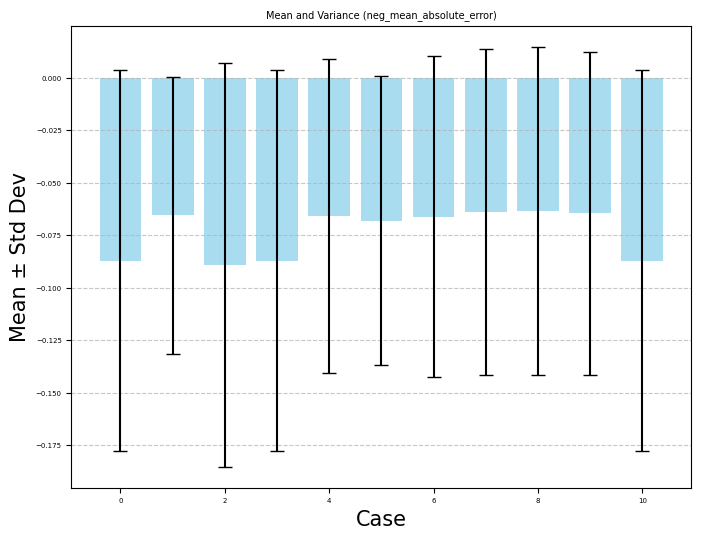

|   Variance |       Mean |
|------------|------------|
| 0.00821548 | -0.0871856 |
| 0.00433566 | -0.0656618 |
| 0.00924028 | -0.0892045 |
| 0.00821548 | -0.0871856 |
| 0.00562139 | -0.0659371 |
| 0.00473992 | -0.0681671 |
| 0.00583593 | -0.0661659 |
| 0.00602508 | -0.0638339 |
| 0.00612714 | -0.0635527 |
| 0.00589964 | -0.0646898 |
| 0.00821548 | -0.0871856 |


In [71]:

fields_to_extract = ['Variance', 'Mean']  # Campos que quieres extraer
distributions = [{field: item[field] for field in fields_to_extract} for item in scores_by_hyperparameters]
df = pd.DataFrame(distributions)
df['Std'] = np.sqrt(df['Variance'])
df['Case'] = df.index

plt.figure(figsize=(8, 6))
plt.bar(df['Case'], df['Mean'], yerr=df['Std'], capsize=5, color='skyblue', alpha=0.7)

# Configuración del gráfico
plt.title("Mean and Variance (neg_mean_absolute_error)")
plt.xlabel("Case")
plt.ylabel("Mean ± Std Dev")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(tabulate(distributions, headers='keys', tablefmt='github'))

Prioritizing a less negative `neg_mean_absolute_error` followed by a narrower standard deviation indicates that **Case 1** performs the best under these criteria.  


### Extra notes
- The implementation employs a consistent `random_state` parameter to ensure reproducibility across executions.  
